# Preprocessing using dog and cat images

The following notebook demonstrates how to prepare images for neural networks. The advantages of this help to reduce the computational effort during training while producing consistently reliable results. 


This notebook will use images from the kaggle competition regarding image recognition for images of dogs and cats. This data set can be found via this link: https://www.kaggle.com/c/dogs-vs-cats



# Index 


** How-tos **
    1. How to move cat/dog photos into respective folders
    2. How to extract a specific number of random images from a folder
    3. How to convert dog images to greyscale (via Tensorflow)
    4. How to resize dog images (via Tensorflow)
    5. How to save numpy arrays as images
    6. How to greyscale and resize images
   
** Playgrounds  **
    
    1. Playground for viewing converted images
    2. Playground for creating resized greyscale images 

** Preprocessing tasks: **

- Reorganise cat/dog photos ✔️
- Convert images to grayscale ✔️
- Resize images using Tensorflow ✔️
- Saved resized greyscale images in folder ✔️


## 1. How to move cat/dog photos to respective folders

As the data set contains both dog and cat images, we must first seperate these into respective folders

In [5]:
import os 

photo_directory = "../train"

for file in os.listdir(photo_directory): 
    if "cat" in file and "jpg" in file:
        os.rename(photo_directory + '/'+ file, "{}/cats/{}".format(photo_directory, file))
    elif "dog" in file and "jpg" in file: 
        os.rename(photo_directory + '/'+ file, "{}/dogs/{}".format(photo_directory, file))
    else:
        pass

## 2. How to extract a specific number of random images from a folder

In [10]:
import os
from numpy import random

number_of_random_samples = 5

dog_samples = os.listdir(os.getcwd() + '/../train/dogs')
random_samples = random.choice(dog_samples, number_of_random_samples)

random_samples

array(['dog.8566.jpg', 'dog.5535.jpg', 'dog.4794.jpg', 'dog.9546.jpg',
       'dog.10645.jpg'],
      dtype='<U13')

## 3. How to convert dog image to greyscale (via Tensorflow)

Original shape of image:  (375, 499, 3)
Initial shape:  (375, 499, 3)
Squeezed shape:  (375, 499)
Gray shape:  (375, 499)


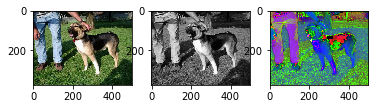

In [2]:
import matplotlib.image as mpimg
import tensorflow as tf
import matplotlib.pyplot as plt

# First, load the image and graph the shape of the image.
image = mpimg.imread("train/dogs/dog.177.jpg")
original_shape = image.shape
print("Original shape of image: ", image.shape)

# Read the image using tf's file reading method
file_contents = tf.read_file("train/dogs/dog.177.jpg")
decoded_image = tf.image.decode_png(file_contents, dtype=tf.uint8, channels=3)   

# Set the shape of the image as this is unknown.
decoded_image.set_shape(original_shape)
print("Initial shape: ", decoded_image.get_shape())
rgb_image_float = tf.image.convert_image_dtype(decoded_image, tf.float32)

#gray_scale image
grayscale_image = tf.image.rgb_to_grayscale(rgb_image_float)
squeezed_image = tf.squeeze(grayscale_image)
print("Squeezed shape: ", squeezed_image.get_shape())

#hsv image
hsv_image = tf.image.rgb_to_hsv(rgb_image_float)

# # Create a TensorFlow Variable
x = tf.Variable(decoded_image, name='x')
y = tf.Variable(squeezed_image, name='y')
z = tf.Variable(hsv_image, name='z')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    original = session.run(x)
    gray = session.run(y)
    hsv = session.run(z)

print("Gray shape: ", gray.shape)
    
fig, axarr = plt.subplots(1,3)
axarr[0].imshow(original)
gray_plot = axarr[1].imshow(gray)
gray_plot.set_cmap('gray')
axarr[2].imshow(hsv)

plt.show()

# 4. How to resize image (via Tensorflow)

Rescale percentage:  30.0 %
Rescaled image to contain 112 rows and 149 columns
Resized Shape:  (112, 149, 3)


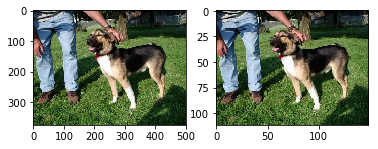

In [3]:
image_file = "train/dogs/dog.177.jpg"

image = mpimg.imread(image_file)
original_shape = image.shape

file_contents = tf.read_file(image_file)
decoded_image = tf.image.decode_png(file_contents, dtype=tf.uint8, channels=3)   
decoded_image.set_shape(original_shape)

rescale_percentage = 0.3
rescaled_row = int(original_shape[0] * rescale_percentage)
rescaled_col = int(original_shape[1] * rescale_percentage)

print("Rescale percentage: ", rescale_percentage * 100, "%")
print("Rescaled image to contain %s rows and %s columns" % (rescaled_row, rescaled_col))


resize_shape = tf.stack([rescaled_row,rescaled_col])

resized_image = tf.image.resize_images(
    decoded_image, 
    resize_shape,
    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
)
print("Resized Shape: ", resized_image.get_shape())

# # Create a TensorFlow Variable
x = tf.Variable(decoded_image, name='x')
y = tf.Variable(resized_image, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    original = session.run(x)
    resized = session.run(y)
        
        
        
fig, axarr = plt.subplots(1,2)

axarr[0].imshow(original)
axarr[1].imshow(resized)
plt.show()

# 5. How to save numpy array as image

In [4]:
import scipy.misc
import numpy as np

image = mpimg.imread("train/dogs/dog.177.jpg")
scipy.misc.imsave("doggy.jpg", image)

# 6. How to resize and greyscale images

1. Resize
2. Greyscale 
3. Save

In [40]:
import os 
from numpy import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import shutil
import scipy.misc
import time

def timer(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        print('Operation took {}s'.format((time2-time1)))
        return ret
    return wrap
    

def grab_random_samples_from_dir(dir, number_of_random_samples):
    samples = os.listdir(dir)
    return random.choice(samples, number_of_random_samples)

def read_image_and_set_shape(image_location):
    image = mpimg.imread(image_location)
    file_contents = tf.read_file(image_location)
    decoded_image = tf.image.decode_png(file_contents, dtype=tf.uint8, channels=3)   
    decoded_image.set_shape(image.shape)

    return decoded_image

def convert_to_greyscale(image):
    rgb_image_float = tf.image.convert_image_dtype(image, tf.float32)
    grayscale_image = tf.image.rgb_to_grayscale(rgb_image_float)
    grayscale_image = tf.squeeze(grayscale_image)

    return grayscale_image


def resize_image(decoded_image, scale_factor):
    rescaled_row = int(decoded_image.shape.as_list()[0] * scale_factor)
    rescaled_col = int(decoded_image.shape.as_list()[1] * scale_factor)

    resize_shape = tf.stack([rescaled_row,rescaled_col])
    resized_image = tf.image.resize_images(
        decoded_image, 
        resize_shape,
        method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
    )
    resized_image = tf.squeeze(resized_image)
    
    return resized_image

@timer
def main(params):
    
    '''
    Preprocess
    '''
    
    random_samples = grab_random_samples_from_dir(params['image_folder'], int(params['number_of_random_samples']))
    
    list_of_originals = []
    list_of_modified = []
    
    for image in random_samples:
        # Read image 
        original_image = read_image_and_set_shape(params['image_folder'] + "/"+image)

        # Resize image
        resized_image = resize_image(original_image, float(params['rescale_size']))
        
        # Grey scale image
        greyscale_image = convert_to_greyscale(resized_image)

        # Append images to list
        
        var = tf.Variable(greyscale_image, name='{}'.format("x"))
        
        list_of_originals.append(original_image)
        list_of_modified.append(var)
    
    # Create Tensorflow Variable 
    tf_original_list = [tf.Variable(image, name="tf_original_list") for image in list_of_originals]
    tf_modified_list = [tf.Variable(image, name="tf_modified_list") for image in list_of_modified]
    
    model = tf.global_variables_initializer()

    original_images_results = []
    modified_images_results = []
        
    with tf.Session() as session:
        session.run(model)

        for image_var in tf_original_list:            
            original_images_results.append(session.run(image_var))
                
        for image_var in tf_modified_list:
            modified_images_results.append(session.run(image_var))
    
    '''
    Visualise
    
    Uncomment to visualise
    '''    
    
#     fig, axarr = plt.subplots(len(original_images_results),2)
#     for i in range(0, len(tf_original_list)):
#         axarr[i, 0].imshow(original_images_results[i])
#         print(modified_images_results[i].shape)
#         print(type(modified_images_results[i]))

#         grayplot = axarr[i, 1].imshow(modified_images_results[i])
        
#         grayplot.set_cmap('gray')

#     plt.show()

    '''
    Save images
    '''
        
    # Make new folder
    if os.path.exists(params['name_of_save_dir']):
        shutil.rmtree(params['name_of_save_dir'])
    os.mkdir(params['name_of_save_dir'])
    
    for i in range(0, len(modified_images_results)):
        scipy.misc.imsave(params['name_of_save_dir'] + "/" + params['name_of_greyscale_files'] + "{}.jpg".format(i + 1), modified_images_results[i])
    
    print("\nCompleted rescaling and converting images to grayscale! ...")

if __name__ == '__main__':  
    
    params = {}    
    try: 
        params['image_folder'] = os.getcwd() + '/' + input("Enter a folder to grab random_images from: ")
        params['number_of_random_samples'] = input("Enter a number of random samples: ")
        params['name_of_save_dir'] = input("Enter the name of a file to save to (optional): ")
        params['name_of_greyscale_files'] = input("Enter the name of a greyscaled_file (optional): ")
        params['rescale_size'] = input("Enter a rescale factor (0 < x <= 1). Default is 0.5 : ")
    except Exception as e:
        print(e)
    
    if len(params['name_of_save_dir']) == 0: 
        name_of_save_dir = "greyscale_images"
    
    if len(params['name_of_greyscale_files']) == 0: 
        name_of_greyscale_files = "grey_image"
    
    if len(params['rescale_size']) == 0: 
        name_of_greyscale_files = 0.5
                
    '''
    EXAMPLE of inputs

    #     params['image_folder'] = 'train/dog_samples'
    #     params['number_of_random_samples'] = "3"
    #     params['name_of_save_dir'] = "grey_dog_images"
    #     params['name_of_greyscale_files'] = "grey_dogs"
    #     params['rescale_size'] = "0.4"

    '''
            
    main(params)

Enter a folder to grab random_images from: train/dog_samples
Enter a number of random samples: 300
Enter the name of a file to save to (optional): grey_dog_images
Enter the name of a greyscaled_file (optional): grey_dog
Enter a rescale factor (0 < x <= 1). Default is 0.5 : 0.4

Completed rescaling and converting images to grayscale! ...
Operation took 93.55634927749634s


# Playgrounds 

### 1. Playground for viewing converted images

Use this tool to ensure the quality of greyscale images are sufficient as feature inputs into the CNN model

Starting conversion...


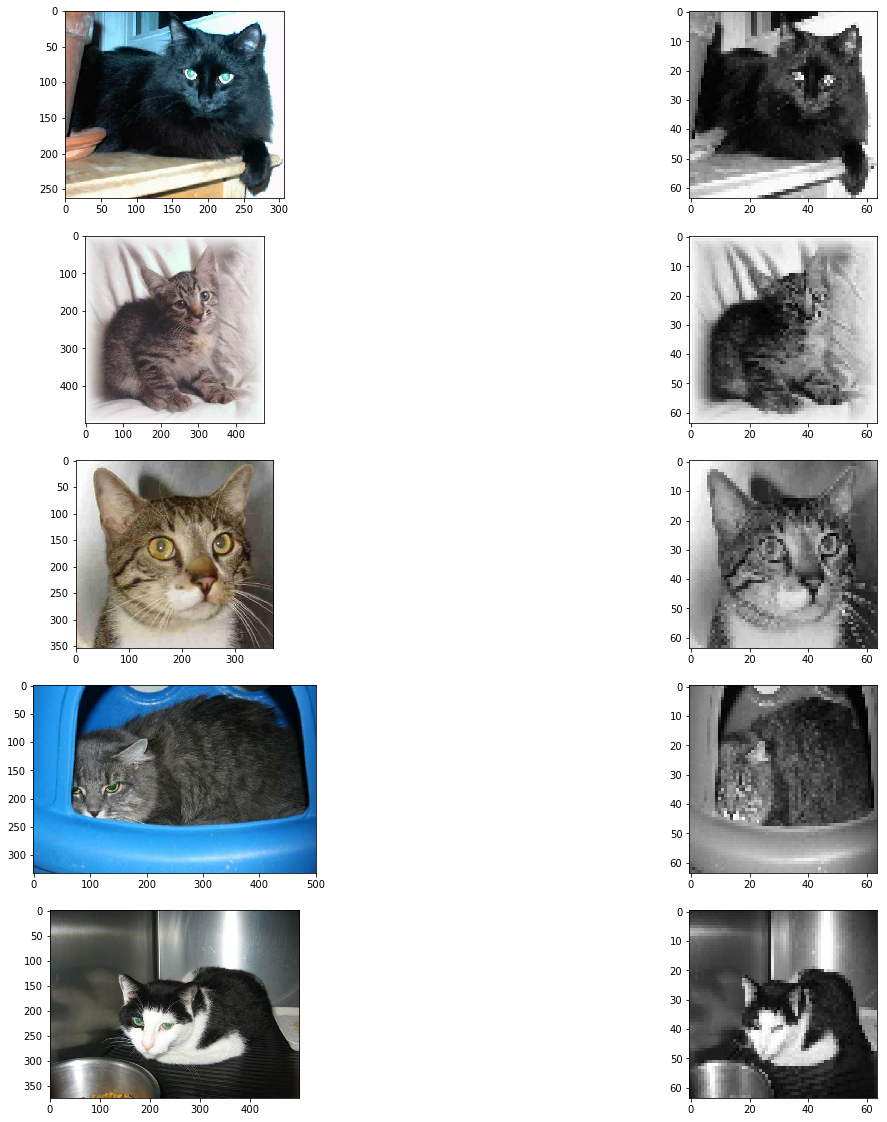


Completed rescaling and converting images to grayscale! ...
Operation took 46.974252223968506s


In [9]:
import os 
from numpy import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import shutil
import scipy.misc
import time

def timer(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        print('Operation took {}s'.format((time2-time1)))
        return ret
    return wrap
    

def grab_random_samples_from_dir(dir, number_of_random_samples):
    samples = os.listdir(dir)
    return random.choice(samples, number_of_random_samples)

def read_image_and_set_shape(image_location):
    image = mpimg.imread(image_location)
    file_contents = tf.read_file(image_location)
    decoded_image = tf.image.decode_png(file_contents, dtype=tf.uint8, channels=3)   
    decoded_image.set_shape(image.shape)

    return decoded_image

def convert_to_greyscale(image):
    rgb_image_float = tf.image.convert_image_dtype(image, tf.float32)
    grayscale_image = tf.image.rgb_to_grayscale(rgb_image_float)
    grayscale_image = tf.squeeze(grayscale_image)

    return grayscale_image


def resize_image(decoded_image, scale_factor):
    rescaled_row = int(decoded_image.shape.as_list()[0] * scale_factor)
    rescaled_col = int(decoded_image.shape.as_list()[1] * scale_factor)

#     resize_shape = tf.stack([rescaled_row,rescaled_col])
    resize_shape = tf.stack([64,64])

    resized_image = tf.image.resize_images(
        decoded_image, 
        resize_shape,
        method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
    )
    resized_image = tf.squeeze(resized_image)
    
    return resized_image

@timer
def main(params):
    
    '''
    Preprocess
    '''
    
    random_samples = grab_random_samples_from_dir(params['image_folder'], int(params['number_of_random_samples']))
    
    list_of_originals = []
    list_of_modified = []
    
    for image in random_samples:
        # Read image 
        original_image = read_image_and_set_shape(params['image_folder'] + "/"+image)

        # Resize image
        resized_image = resize_image(original_image, float(params['rescale_size']))
        
        # Grey scale image
        greyscale_image = convert_to_greyscale(resized_image)

        # Append images to list
        
        var = tf.Variable(greyscale_image, name='{}'.format("x"))
        
        list_of_originals.append(original_image)
        list_of_modified.append(var)
    
    # Create Tensorflow Variable 
    tf_original_list = [tf.Variable(image, name="tf_original_list") for image in list_of_originals]
    tf_modified_list = [tf.Variable(image, name="tf_modified_list") for image in list_of_modified]
    
    model = tf.global_variables_initializer()

    original_images_results = []
    modified_images_results = []
        
    with tf.Session() as session:
        session.run(model)

        for image_var in tf_original_list:            
            original_images_results.append(session.run(image_var))
                
        for image_var in tf_modified_list:
            modified_images_results.append(session.run(image_var))
    
    '''
    Visualise
    
    Uncomment to visualise
    '''    
    
    fig, axarr = plt.subplots(len(original_images_results),2)
    fig.set_figheight(20, forward=True)
    fig.set_figwidth(20, forward=True)
    for i in range(0, len(tf_original_list)):
        axarr[i, 0].imshow(original_images_results[i])
        grayplot = axarr[i, 1].imshow(modified_images_results[i])
        
        grayplot.set_cmap('gray')

    plt.show()

        
#     # Make new folder
    print("\nCompleted rescaling and converting images to grayscale! ...")

if __name__ == '__main__':  
    
    params = {}    

    params['image_folder'] = 'train/cats'
    params['number_of_random_samples'] = "5"
    params['name_of_save_dir'] = "grey_images/testing/cats"
    params['name_of_greyscale_files'] = "cats"
    params['rescale_size'] = "0.7"        
    
    print("Starting conversion...")
    main(params)

## 2. Playground for creating resized greyscale images

Use this tool to actually save the greyscaled and resized images 

In [5]:
import os 
from numpy import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import shutil
import scipy.misc
import time
from methods import(
    resize_image_with_new_shape
)

def timer(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        print('Operation took {}s'.format((time2-time1)))
        return ret
    return wrap
    

def grab_random_samples_from_dir(dir, number_of_random_samples):
    samples = os.listdir(dir)
    return random.choice(samples, number_of_random_samples)

def read_image_and_set_shape(image_location):
    image = mpimg.imread(image_location)
    file_contents = tf.read_file(image_location)
    decoded_image = tf.image.decode_png(file_contents, dtype=tf.uint8, channels=3)   
    decoded_image.set_shape(image.shape)

    return decoded_image

def convert_to_greyscale(image):
    rgb_image_float = tf.image.convert_image_dtype(image, tf.float32)
    grayscale_image = tf.image.rgb_to_grayscale(rgb_image_float)
    grayscale_image = tf.squeeze(grayscale_image)

    return grayscale_image


def resize_image(decoded_image, shape):
    resize_shape = tf.stack(shape)
    resized_image = tf.image.resize_images(
        decoded_image, 
        resize_shape,
        method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
    )
    resized_image = tf.squeeze(resized_image)
    
    return resized_image

@timer
def main(params):
    
    '''
    Preprocess
    '''
    
    random_samples = grab_random_samples_from_dir(params['image_folder'], int(params['number_of_random_samples']))
    
    list_of_originals = []
    list_of_modified = []
    
    for image in random_samples:
        # Read image 
        original_image = read_image_and_set_shape(params['image_folder'] + "/"+image)

        # Resize image
        resized_image = resize_image_with_new_shape(original_image, [64,64])
        
        # Grey scale image
        greyscale_image = convert_to_greyscale(resized_image)

        # Append images to list
        
        var = tf.Variable(greyscale_image, name='{}'.format("x"))
        
        list_of_originals.append(original_image)
        list_of_modified.append(var)
    
    # Create Tensorflow Variable 
    tf_original_list = [tf.Variable(image, name="tf_original_list") for image in list_of_originals]
    tf_modified_list = [tf.Variable(image, name="tf_modified_list") for image in list_of_modified]
    
    model = tf.global_variables_initializer()

    original_images_results = []
    modified_images_results = []
        
    with tf.Session() as session:
        session.run(model)

        for image_var in tf_original_list:            
            original_images_results.append(session.run(image_var))
                
        for image_var in tf_modified_list:
            modified_images_results.append(session.run(image_var))

    '''
    Save images
    '''
        
#     # Make new folder
    if os.path.exists(params['name_of_save_dir']):
        shutil.rmtree(params['name_of_save_dir'])
    os.mkdir(params['name_of_save_dir'])
    
    for i in range(0, len(modified_images_results)):
        scipy.misc.imsave(params['name_of_save_dir'] + "/" + params['name_of_greyscale_files'] + "{}.jpg".format(i + 1), modified_images_results[i])
    
    print("\nCompleted rescaling and converting images to grayscale! ...")

if __name__ == '__main__':  
    
    params = {}    

    params['image_folder'] = 'train/cats'
    params['number_of_random_samples'] = "400"
    params['name_of_save_dir'] = "grey_images/testing/cats_0.6"
    params['name_of_greyscale_files'] = "cats"
    
    print("Starting conversion...")
    main(params)

Starting conversion...

Completed rescaling and converting images to grayscale! ...
Operation took 447.9898319244385s
